In [0]:
import tensorflow as tf
import urllib
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


In [0]:
tfk  = tf.keras
tfkl = tf.keras.layers
tfka = tf.keras.applications

In [3]:
model = tfka.vgg19.VGG19(include_top=False, input_shape=(224, 224, 3), weights="imagenet")

80142336/80134624 [==============================] - 1s 0us/step


In [4]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
def get_layer_output(model, layer_index):
  layer_output = model.layers[layer_index].output
  return tfk.backend.function(model.inputs, [layer_output])
  


In [0]:
def loadImage(URL, target_size=(224, 224)):
    with urllib.request.urlopen(URL) as url:
        img = tfk.preprocessing.image.load_img(BytesIO(url.read()), target_size=target_size)

    return tfk.preprocessing.image.img_to_array(img)

In [0]:
first_layer = get_layer_output(model, 1)

In [48]:
print(first_layer)

In [0]:
image = loadImage("https://i.pinimg.com/236x/67/75/65/677565c71332f51248b724ffde92cd26--cute-puppies-and-kittens-cute-cats-and-dogs.jpg", target_size=(224, 224))

In [56]:
image.shape

(224, 224, 3)

In [57]:
image = np.expand_dims(image, axis=0) # add batch dimension to the image tensor
print(image.shape)

(1, 224, 224, 3)


In [0]:
first_layer_output = first_layer(image)[0][0]

In [61]:
first_layer_output.shape

(224, 224, 64)

In [0]:
def show_layer_outputs(images, layer_number, num_images_per_row = 5):
  num_channels = images.shape[-1]
  figure, ax = plt.subplots(nrows=int(np.ceil(num_channels/num_images_per_row)), ncols=num_images_per_row, figsize=(21, 8))
  for i in range(num_channels):
    channel_image = images[:, :, i]
    ax[i//num_images_per_row, i%num_images_per_row].imshow(channel_image)
    ax[i//num_images_per_row, i%num_images_per_row].set_title("Layer: {}, channel: {}".format(layer_number, i+1))
  plt.show()


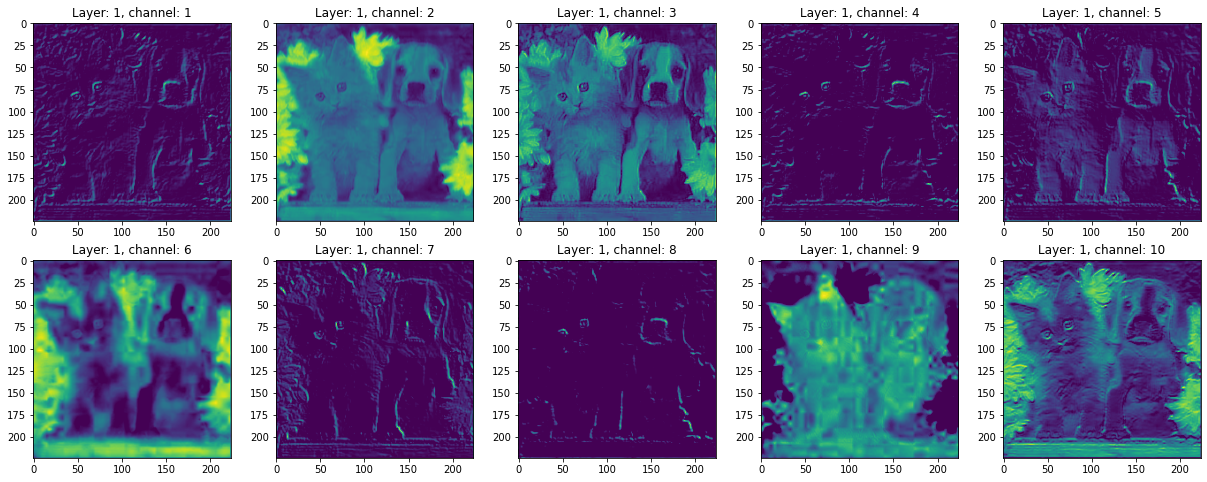

In [86]:
show_layer_outputs(first_layer_output[:, :, :10], 1)

In [0]:
def visualize_layer(model, layer_index, num_images=10):
  layer = get_layer_output(model, layer_index)
  layer_output = layer(image)[0][0]
  show_layer_outputs(layer_output[:, :, :num_images], layer_index)
  

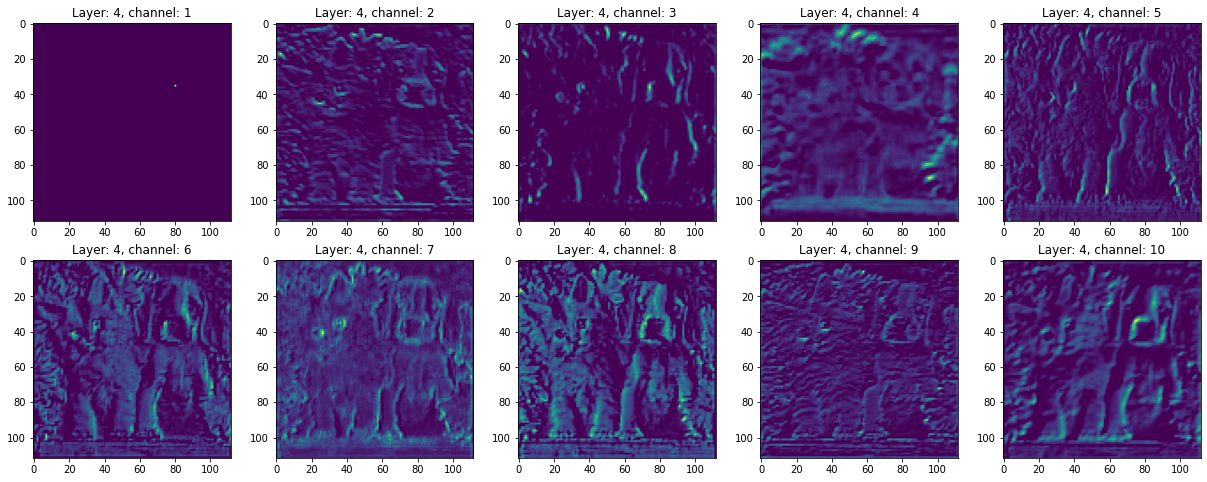

In [91]:
visualize_layer(model, 4)